## ИДЗ1

### Часть 1. Задание: 
Модель задана дифференциальным уравнением, которое имеет вид х'(t) = k(t)*f(t). Функция f известна, функцию k нужно найти. Предполагается, что k имеет вид k(t) = а*е^(b*t) или k(t) = a*b^t.

Функция f(t) имеет вид: f(t) = p * t^m + q * t^n + r, параметры для 30 вариантов приведены в документе EXCEL.

Кроме этого, известны значения x'(t), t = [0 : 0.1 : 1] – 30 строчек по 11 значений, для 30 вариантов.

Замечание. Для решения ДУ по методу Эйлера начальное значение х(0)=х0 определить самостоятельно.

In [1]:
# подключение библиотек
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# считывание данных
x_t = pd.read_csv('value1.csv', sep=';')
print("Значения x'(t) при соответствующих значениях t:\n", x_t)

param = pd.read_csv('value2.csv', sep=';', skiprows=0).values[0]
print("\n\nЗначения параметров для функции f(t):\n", param)

Значения x'(t) при соответствующих значениях t:
       t    x_pr(t)
0   0.0   2.731796
1   0.1   3.073904
2   0.2   3.363661
3   0.3   3.680299
4   0.4   4.230261
5   0.5   4.772622
6   0.6   5.586051
7   0.7   6.720271
8   0.8   8.066742
9   0.9   9.844773
10  1.0  12.263060


Значения параметров для функции f(t):
 [3 0 2 1 2]


In [3]:
# функция расчёта значений k(t)
def funcK(x_t, param):
    k = []
    for i in range(len(x_t.values[:])):
        k.append(float(x_t['x_pr(t)'][i] / 
            (param[2]* (x_t['x_pr(t)'][i])**param[0] + param[3]*(x_t['x_pr(t)'][i])**param[1] + param[4])))
    return(k)

In [4]:
# полученные значение k(t)
K = funcK(x_t, param)
K

[0.06240795666006228,
 0.050317689040645756,
 0.04251642472087989,
 0.03583670883516267,
 0.02739771995610202,
 0.021652320718597788,
 0.01588688725337531,
 0.011016794125073427,
 0.007661862861588909,
 0.005150820485551109,
 0.003322149835571193]

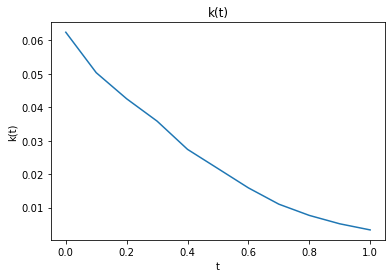

In [5]:
# график зависимости k от аргумента t
plt.plot(x_t['t'][:], K)
plt.title('k(t)')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.show()

В результате, был получен график приближённый к прямой. Найдём коэффициенты a и b.

1) Коэффициенты для модели вида k(t) = a1*t + b1;

In [6]:
a1 = (np.mean(x_t['t'][:] * K) - np.mean(x_t['t'][:])*np.mean(K)) / (np.mean(x_t['t'][:]**2) - np.mean(x_t['t'][:])**2)
b1 = np.mean(K) - a1*np.mean(x_t['t'][:])
print("a1 = %.5f" % a1)
print("b1 = %.5f" % b1)

a1 = -0.05835
b1 = 0.05492


In [7]:
# предсказанные первой моделью значения
y_1 = a1*x_t['t'][:] + b1
y_1

0     0.054916
1     0.049081
2     0.043246
3     0.037412
4     0.031577
5     0.025742
6     0.019908
7     0.014073
8     0.008239
9     0.002404
10   -0.003431
Name: t, dtype: float64

In [8]:
# Рассчёт коэффиента детерминации для первой модели
R2_1 = r2_score(K, y_1)
print("R2 = %.5f" % R2_1) 

R2 = 0.95563


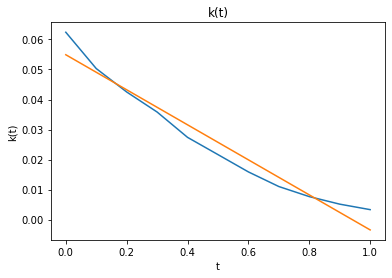

In [9]:
# сравнение теоретической и эмпирической функций первой модели
plt.plot(x_t['t'][:], K)
plt.plot(x_t['t'][:], y_1)
plt.title('k(t)')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.show()

2) Коэффициенты для модели вида k(t) = b2* e^(a2* t);

In [10]:
a2 = (np.mean(x_t['t'][:] * list(map(math.log, K))) - np.mean(x_t['t'][:])*np.mean(list(map(math.log, K)))) \
        / (np.mean(x_t['t'][:]**2) - np.mean(x_t['t'][:])**2)
b2 = math.exp(np.mean(list(map(math.log, K))) - a2*np.mean(x_t['t'][:]))
print("a2 = %.5f" % a2)
print("b2 = %.5f" % b2)

a2 = -2.89338
b2 = 0.07658


In [11]:
# предсказанные второй моделью значения
y_2 = b2*np.exp(a2*x_t['t'][:])
y_2

0     0.076575
1     0.057336
2     0.042931
3     0.032145
4     0.024069
5     0.018022
6     0.013494
7     0.010104
8     0.007565
9     0.005665
10    0.004241
Name: t, dtype: float64

In [12]:
# Рассчёт коэффиента детерминации для второй модели

R2_2 = r2_score(K, y_2)
print("R2 = %.5f" % R2_2)

R2 = 0.92454


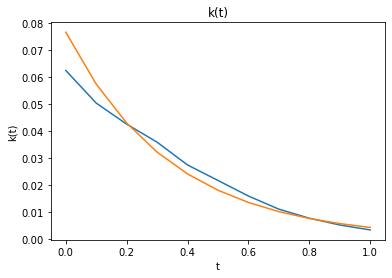

In [13]:
# сравнение теоретической и эмпирической функции второй модели
plt.plot(x_t['t'][:], K)
plt.plot(x_t['t'][:], y_2)
plt.title('k(t)')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.show()

В результате, более точной является линейная модель k(t) = a1*t + b1 с R2 = 0.95563.

### Часть 2. Задание:
Построить модель для x(t). Способы получения x(t): \
-- аналитически; \
-- численным методом (метод Эйлера).

#### Аналитическое нахождение значения x(t)
Найдём интеграл x'(t) = 2a*t^4 + 3at + 2b*t^3 + 3b.

In [19]:
a, b = a1, b1
x_analit = []
for t in x_t['t']:
    x_analit.append( round( (2*a*t**5)/5 + (3*a*t**2)/2 + (b*t**4)/2 + 3*b*t, 6) )
x_analit

[0.0,
 0.015602,
 0.029485,
 0.041713,
 0.05236,
 0.06148,
 0.069085,
 0.075108,
 0.079384,
 0.081615,
 0.081347]

#### Поиск x(t) численным методом (метод Эйлера)
Формула Эйлера для численного решения обыкновенного дифференциального уравнения имеет вид: x_(i+1) = x_i + h*f(t)

In [21]:
# функция x'(t)
def function(t): 
    return 2*a*(t**4) + 3*a*t + 2*b*(t**3) + 3*b

In [26]:
# функция для задания массива значений t при заданном шаге
def func_t(h):
    t = []
    i = 0.0
    while(i <= 1): 
        t.append(i)
        i += h
    if t[len(t)-1] < 0.9999:
        t.append(1)
    return t

In [56]:
# функция для оценки точности расчитанных значений
def accuracy(x1, x2):
    if((2*len(x1)) > len(x2)):
        size = len(x1) - 1
    else:
        size = len(x1)
    
    return max(x1[:size] - x2[1::2])

In [62]:
# метод Эйлера-Коши численного решения ОДУ
def Eiler():
    x1, x2 = [], []
    h = 0.1
    eps = 0.01
    
    x1.append(x_analit[0])
    for i in range(10):
        x1.append(x1[i] + h*function(x_t['t'][i]))
    x1 = np.array(x1)
    
    while(1):
        h /= 2
        t2 = func_t(h)
        x2.append(x_analit[0])
        
        for i in range(0, len(t2)-1):
            x2.append(x2[i] + h*function(t2[i]))
        x2 = np.array(x2)
        
        # оценка точности расчитанных значений
        accuracy_ = accuracy(x1, x2)
        if accuracy_ < eps:
            return t2, x2
        
        x1, t1 = x2, np.array(t2)
        x2, t2 = [], []

In [64]:
# векторы значений x(t) и t
t_num_met , x_num_met = Eiler()

In [65]:
# уравнивание размера выборок
x_analit = []
for i in range(len(x_num_met)):
    x_analit.append( (2*a*t_num_met[i]**5)/5 + (3*a*t_num_met[i]**2)/2 + (b*t_num_met[i]**4)/2 + 3*b*t_num_met[i] )

In [70]:
# рассчёт коэффициента детерминации
R2_x = round( r2_score(x_analit, x_num_met), 6)
R2_x

0.990928

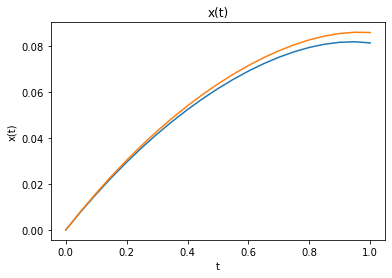

In [72]:
# графическое сравнение значений функции x(t), рассчитанных аналитически и численных методом Эйлера
plt.plot(t_num_met, x_analit)
plt.plot(t_num_met, x_num_met)
plt.title('x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

### Часть 3. Задание:
Произвести проверку адекватности полученной модели, используя критерий Хи-квадрат. \
\
H0 -- совокупность значений  не даёт оснований отказываться от модели. \
H1 -- модель не отвечает заданным требованиям.

#### Критерий Хи-квадрат

![title](Хи.png)

In [91]:
n = len(x_analit)
eps = 0.01
alfa = 0.05
v1, v2 = 0., 0.

W_real = x_analit
W_model = x_num_met

E = abs(W_real - W_model)
for e in E:
    if e < eps:
        v1+=1
    else: 
        v2+=1
        
print("Количество выполнившихся случаев:", v1)
print("Количество невыполнившихся случаев:", v2)
print("\n",E)

Количество выполнившихся случаев: 21.0
Количество невыполнившихся случаев: 0.0

 [0.         0.00021863 0.00043574 0.00064983 0.00085987 0.00106527
 0.00126585 0.00146189 0.00165412 0.00184366 0.00203212 0.00222151
 0.00241431 0.0026134  0.00282213 0.00304427 0.00328404 0.00354609
 0.0038355  0.00415779 0.00451894]


In [97]:
# так как v <= 100
hi2 = 31.41 # критическое значение
hi2_obs = np.sum((n - v1)**2 / v1) # наблюдаемое значение

if hi2 > hi2_obs:
    print("Модель является адекватной")
else: 
    print("Модель не является адекватной")

Модель является адекватной


#### Критерий Смирнова-Колмогорова

![title](КС.png)

In [99]:
n = len(x_analit)
S = max(E)
lambda_ = round(S*(n**(1/2)), 6)
alfa = 0.05

kc = 0.226
print("Критическое значение критерия Колмогорова-Смирнова:", kc)
print("lambda:", lambda_)
print("\nМодель является адекватной")

# Чем ближе к нулю значение lambda, тем меньше модель отличается от реальной

Критическое значение критерия Колмогорова-Смирнова: 0.226
lambda: 0.020708

Модель является адекватной
